In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from qmiotools.integrations.tkbackend import Qmio


0.1.0
Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_05_11__13_27_21.json


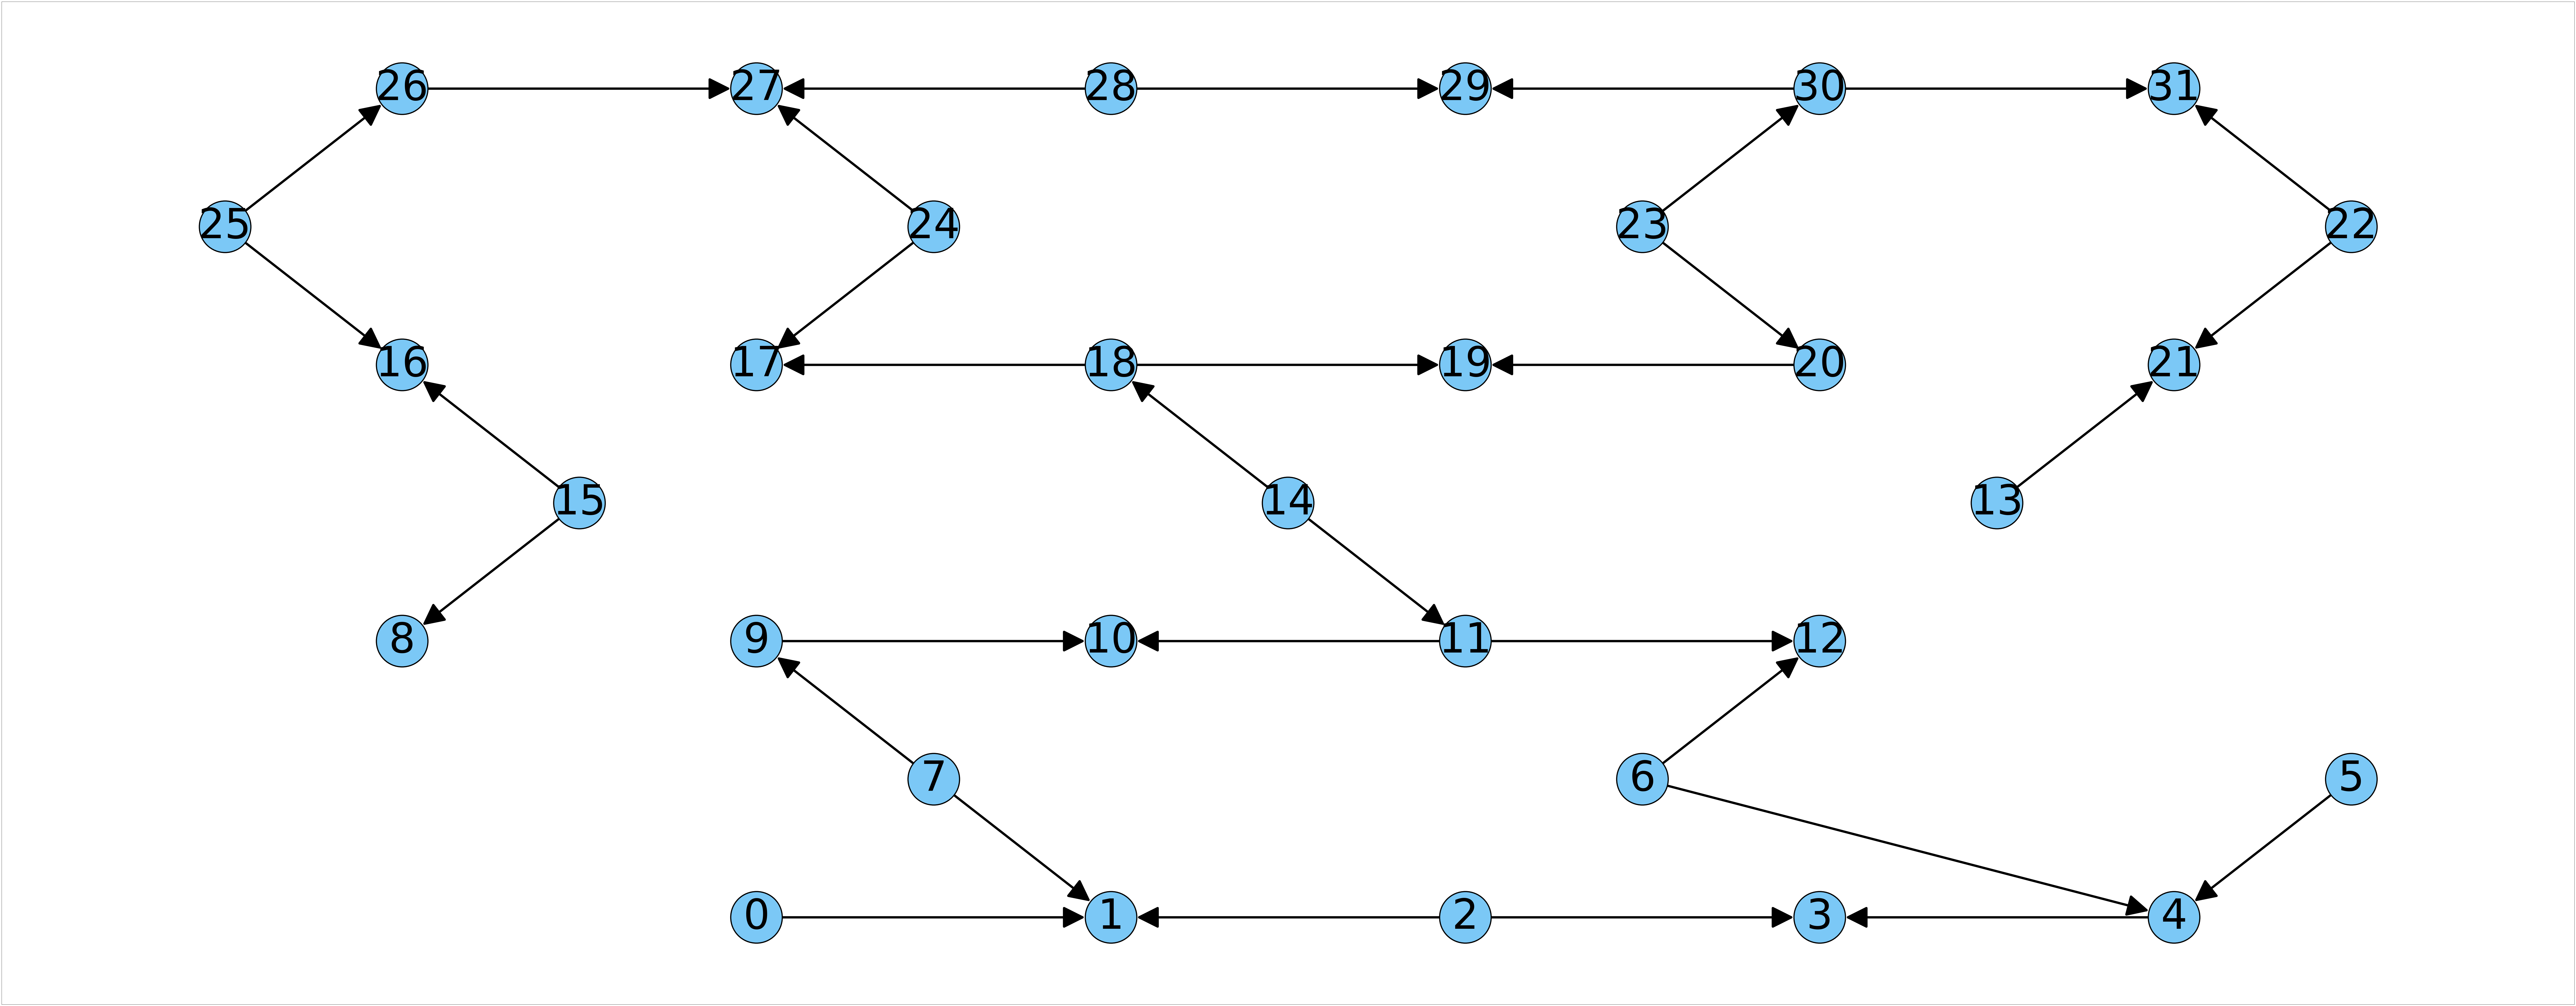

In [14]:
%matplotlib inline
Q=Qmio()
print(Q._backend_version)
Q.draw_graph()

In [8]:
from pytket.circuit import Circuit
from pytket.circuit import fresh_symbol
from pytket.circuit.display import render_circuit_jupyter
a =fresh_symbol("a")
bell = Circuit(32,2)
bell.H(0)
bell.CX(0,1)
bell.Measure(0,0)
bell.Measure(1,1)




[H q[0]; CX q[0], q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ]

In [9]:
render_circuit_jupyter(bell)
    

In [10]:
#placement={bell.qubits[0]:0,bell.qubits[1]:1,bell.qubits[2]:2}
ibell=Q.get_compiled_circuit(bell,1)
render_circuit_jupyter(ibell)


# THIS CELL ONLY WORKS WHEN EXECUTED IN A NODE CONNECTED TO THE QPU

In [11]:
br=Q.run_circuit(ibell,n_shots=5000)

OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];
{'results': {'c': {'11': 2189, '00': 1979, '01': 487, '10': 345}}, 'execution_metrics': {'optimized_circuit': 'OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];', 'optimized_instruction_count': 36}}


In [12]:
br=Q.run_circuits([ibell,ibell],n_shots=5000)

[[Rz(3.5) q[0]; SX q[1]; SX q[0]; Rz(0) q[0]; ECR q[0], q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ], [Rz(3.5) q[0]; SX q[1]; SX q[0]; Rz(0) q[0]; ECR q[0], q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ]] [5000, 5000]
<tket::Circuit, qubits=32, gates=7> 5000
OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];
{'results': {'c': {'11': 2175, '00': 2018, '10': 345, '01': 462}}, 'execution_metrics': {'optimized_circuit': 'OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];', 'optimized_instruction_count': 36}}
<tket::Circuit, qubits=32, gates=7> 5000
OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];
{'results': {'c': {'11': 2166, '01': 477, '10': 357, '0

In [13]:
r=Q.run_circuits([ibell,ibell],n_shots=[5000,1000])

[[Rz(3.5) q[0]; SX q[1]; SX q[0]; Rz(0) q[0]; ECR q[0], q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ], [Rz(3.5) q[0]; SX q[1]; SX q[0]; Rz(0) q[0]; ECR q[0], q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ]] [5000, 1000]
<tket::Circuit, qubits=32, gates=7> 5000
OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];
{'results': {'c': {'00': 2058, '11': 2145, '01': 460, '10': 337}}, 'execution_metrics': {'optimized_circuit': 'OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];', 'optimized_instruction_count': 36}}
<tket::Circuit, qubits=32, gates=7> 1000
OPENQASM 3.0;include "qelib1.inc";qreg q[32];creg c[2];rz(3.5*pi) q[0];sx q[1];sx q[0];rz(0.0*pi) q[0];ecr q[0],q[1];measure q[0] -> c[0];measure q[1] -> c[1];
{'results': {'c': {'01': 99, '00': 383, '11': 449, '10'